<a href="https://colab.research.google.com/github/Deadspree/SML-Final/blob/main/10_hiragana_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from google.colab import drive
import os

drive.mount('/content/drive')


Mounted at /content/drive


###Read the data

In [8]:
x_train = np.load('/content/drive/MyDrive/Final Project_SML/10_classes_hiragna_data/kmnist-train-imgs.npz')['arr_0']
y_train = np.load('/content/drive/MyDrive/Final Project_SML/10_classes_hiragna_data/kmnist-train-labels.npz')['arr_0']
x_test = np.load('/content/drive/MyDrive/Final Project_SML/10_classes_hiragna_data/kmnist-test-imgs.npz')['arr_0']
y_test = np.load('/content/drive/MyDrive/Final Project_SML/10_classes_hiragna_data/kmnist-test-labels.npz')['arr_0']

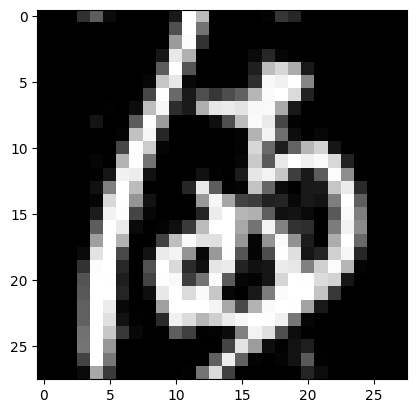

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_array = x_test[1000]
from matplotlib import pyplot as plt

plt.imshow(img_array.reshape(28,28,1), cmap='gray')
plt.show()

###Data Exploration

In [ ]:
print("Kuzushi img train: ",x_train.shape )
print("Kuzushi label train: ", y_train.shape)
print("kuzushi img test: ", x_test.shape)
print("Kuzushi label test: ", y_test.shape)

Kuzushi img train:  (60000, 28, 28)
Kuzushi label train:  (60000,)
kuzushi img test:  (10000, 28, 28)
Kuzushi label test:  (10000,)


###Data Processing

(60000, 28, 28, 1)

In [9]:
x_train = x_train.reshape(60000,28,28,1)/255.0
x_test = x_test.reshape(10000,28,28,1)/255.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2018)

In [ ]:
X_train.shape

(54000, 28, 28, 1)

###Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Model
model = Sequential()
# Add convolution 2D
model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same",
        kernel_initializer='he_normal',input_shape=(28, 28, 1)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
# Add dropouts to the model
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
# Add dropouts to the model
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
# Add dropouts to the model
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics='acc', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


422/422 [==============================] - 15s 16ms/step - loss: 0.9253 - acc: 0.6965 - val_loss: 0.2887 - val_acc: 0.9037
Epoch 2/100
422/422 [==============================] - 7s 16ms/step - loss: 0.3727 - acc: 0.8881 - val_loss: 0.1572 - val_acc: 0.9475
Epoch 3/100
422/422 [==============================] - 6s 14ms/step - loss: 0.2766 - acc: 0.9182 - val_loss: 0.1230 - val_acc: 0.9613
Epoch 4/100
422/422 [==============================] - 6s 15ms/step - loss: 0.2271 - acc: 0.9332 - val_loss: 0.1074 - val_acc: 0.9675
Epoch 5/100
422/422 [==============================] - 6s 14ms/step - loss: 0.2000 - acc: 0.9411 - val_loss: 0.0958 - val_acc: 0.9673
Epoch 6/100
422/422 [==============================] - 6s 14ms/step - loss: 0.1781 - acc: 0.9473 - val_loss: 0.0890 - val_acc: 0.9747
Epoch 7/100
422/422 [==============================] - 7s 16ms/step - loss: 0.1630 - acc: 0.9524 - val_loss: 0.0864 - val_acc: 0.9742
Epoch 8/100
422/422 [==============================] - 6s 14ms/step - los

###Model Evaluation

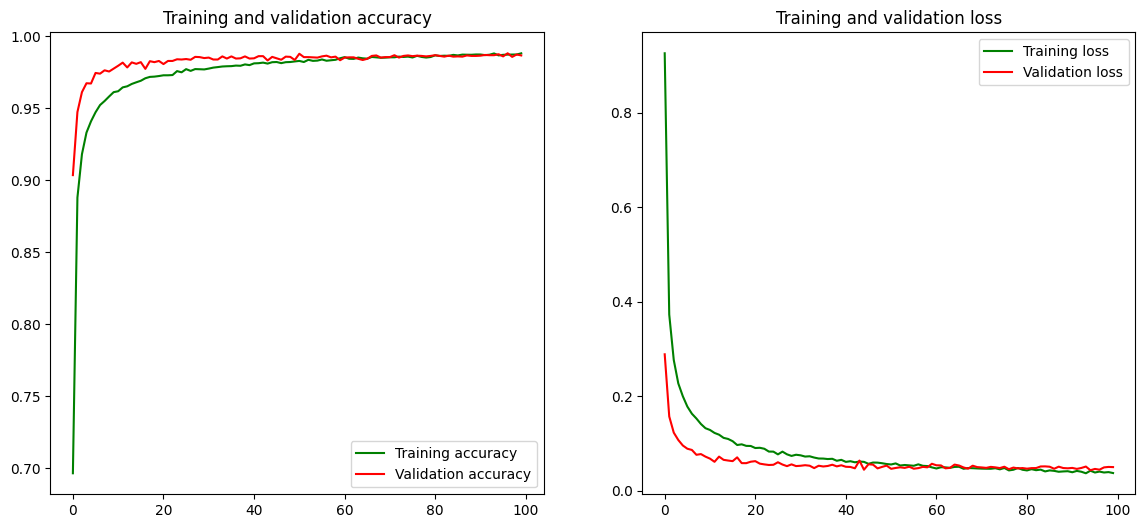

In [ ]:
#Plot the history
import matplotlib.pyplot as plt
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history)

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 2s 24ms/step - loss: 0.2084 - acc: 0.9569
test loss, test acc: [0.20835722982883453, 0.9569000005722046]


In [ ]:
model.save("/content/drive/MyDrive/Final Project_SML/10_classes_hiragna_data/10_hiragana_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
hiragana_a = '\u3042'
hiragana_ka = '\u304B'
hiragana_ki = '\u304D'

# Printing the characters
print(hiragana_a)
print(hiragana_ka)
print(hiragana_ki)

あ
か
き


In [2]:
model = create_model()
model.load('/content/drive/MyDrive/Final Project_SML/10_classes_hiragna_data/10_hiragana_model.h5')

NameError: name 'create_model' is not defined

In [4]:
import tensorflow as tf

In [6]:
import numpy as np
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Final Project_SML/10_classes_hiragna_data/10_hiragana_model.h5')

In [10]:
new_model.evaluate(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 3s 4ms/step - loss: 0.2084 - acc: 0.9569


[0.20835720002651215, 0.9569000005722046]

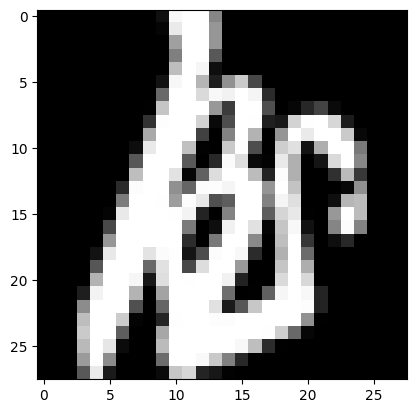

In [42]:
from matplotlib import pyplot as plt
plt.imshow(x_test[73].reshape(28,28,1), cmap='gray')
plt.show()

In [30]:
pred = new_model.predict(np.expand_dims(x_test[9998], axis = 0))

1/1 [==============================] - 0s 32ms/step


In [31]:
y = np.argmax(pred)
y

4

In [33]:
y_test[9998]

4

In [37]:
indices = np.where(y_test==1)

In [35]:
indices

(array([  20,   22,   24,   41,   73,   77,   91,   94,  127,  148,  158,
         163,  179,  185,  193,  212,  214,  219,  222,  227,  248,  261,
         265,  275,  284,  285,  291,  293,  303,  311,  313,  325,  339,
         354,  358,  371,  380,  394,  395,  396,  397,  427,  442,  451,
         452,  470,  518,  527,  538,  541,  547,  554,  563,  572,  577,
         584,  588,  595,  600,  627,  639,  642,  654,  659,  682,  683,
         686,  696,  708,  713,  740,  747,  755,  767,  770,  787,  795,
         797,  801,  825,  837,  846,  847,  858,  883,  884,  904,  910,
         922,  944,  946,  961,  963,  976,  983,  988,  990,  995, 1007,
        1008, 1010, 1016, 1017, 1049, 1061, 1081, 1089, 1094, 1118, 1119,
        1131, 1132, 1138, 1140, 1146, 1151, 1156, 1161, 1166, 1169, 1174,
        1193, 1203, 1216, 1246, 1252, 1256, 1259, 1275, 1283, 1289, 1297,
        1308, 1317, 1338, 1352, 1371, 1390, 1396, 1404, 1405, 1408, 1417,
        1423, 1431, 1442, 1451, 1456, 